In [829]:
import pandas
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

from IPython.display import Image
from subprocess import call

from sklearn.exceptions import ConvergenceWarning

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import sklearn.tree as tree # 1. Decision Tree
from sklearn.neural_network import MLPClassifier # 2. Neural Network
from sklearn.neighbors import KNeighborsClassifier # 3. KNN (K-Nearest Neighbors)
from sklearn.svm import SVC # 4. Support Vector Machine (SVM)
from sklearn.ensemble import RandomForestClassifier # 5. Random Forest
from sklearn.linear_model import LogisticRegression # 6. Logistic Regression


from sklearn.metrics import confusion_matrix as conf_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# visualization
from sklearn.manifold import TSNE


from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# data
import seaborn as sns


In [830]:
# Load the data
df = pandas.read_csv("dataset.csv")

# Drop uneeded columns
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Print the first 5 rows of the data
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Local Outlier Factor (LOF)

In [831]:
# Create a pipeline
steps = [('scale', StandardScaler()), 
         ('LOF', LocalOutlierFactor())
]  

X = df.drop(['diagnosis'], axis = 1)

# Create the pipeline: pipeline
outliers = Pipeline(steps).fit_predict(X)


In [832]:
# Add column
df['outliers'] = outliers
# Look at the top 20
df.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,outliers
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,-1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,-1


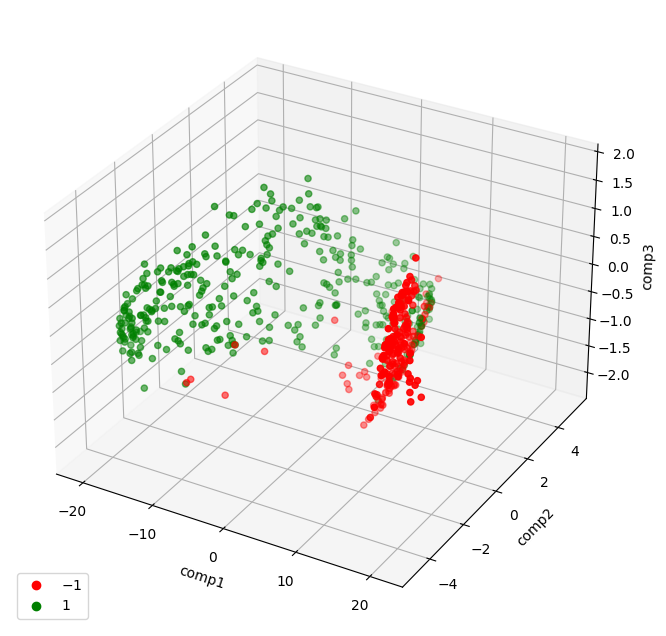

In [833]:
diagnosis_map = {'M': -1, 'B': 1}
from matplotlib.colors import ListedColormap


tsne = TSNE(perplexity=50, n_components=3).fit_transform(X)
tsne = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])
tsne['diagnosis'] = df['diagnosis'].map(diagnosis_map)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne['comp1'], tsne['comp2'], tsne['comp3'], c=tsne['diagnosis'], cmap=ListedColormap(['red', 'blue', 'green']))  # create 3D scatter plot

# add labels and legend
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.legend(*scatter.legend_elements(), loc='lower left')

plt.show()


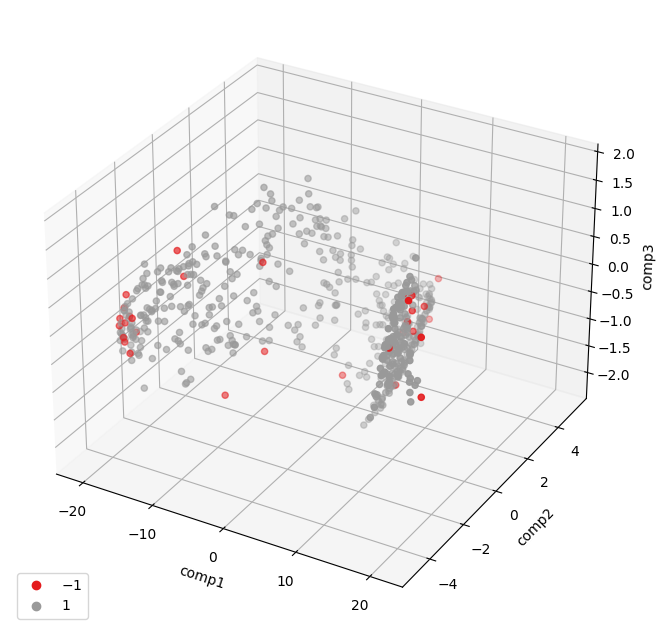

In [834]:
tsne = TSNE(perplexity=50, n_components=3).fit_transform(X) # TODO: é chegar a um valor de perplexity que mostre uma boa separação entre os grupos
tsne = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])
tsne['outliers'] = outliers
# 
# 
fig = plt.figure(figsize=(8, 8))  # create a new figure
ax = fig.add_subplot(111, projection='3d')  # create a 3D subplot
scatter = ax.scatter(tsne['comp1'], tsne['comp2'], tsne['comp3'], c=tsne['outliers'], cmap='Set1')  # create 3D scatter plot
# 
# add labels and legend
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.legend(*scatter.legend_elements(), loc='lower left')
# 
plt.show()  # display the plot

# Gaussian Mixture Models (GMM)

In [835]:
df = pandas.read_csv("dataset.csv")

# Drop uneeded columns
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

X = df.drop(['diagnosis'], axis = 1)

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [836]:
# Finding densities
density_scores = abs(gm.score_samples(X))

In [837]:
# Define threshold
threshold = np.percentile(density_scores, 2.5)

print(threshold)


14.62245634938286


In [838]:
# Finding outliers
X[density_scores< threshold]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.2776,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
3,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
9,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.0580,1.1050,0.22100,0.4366,0.20750
12,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,...,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,0.06343,...,24.090,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
71,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
78,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,0.08142,...,23.370,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964
83,19.100,26.29,129.10,1132.0,0.12150,0.1791,0.19370,0.14690,0.1634,0.07224,...,20.330,32.72,141.30,1298.0,0.13920,0.2817,0.2432,0.18410,0.2311,0.09203
112,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,0.07769,...,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
138,14.950,17.57,96.85,678.1,0.11670,0.1305,0.15390,0.08624,0.1957,0.06216,...,18.550,21.43,121.40,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147


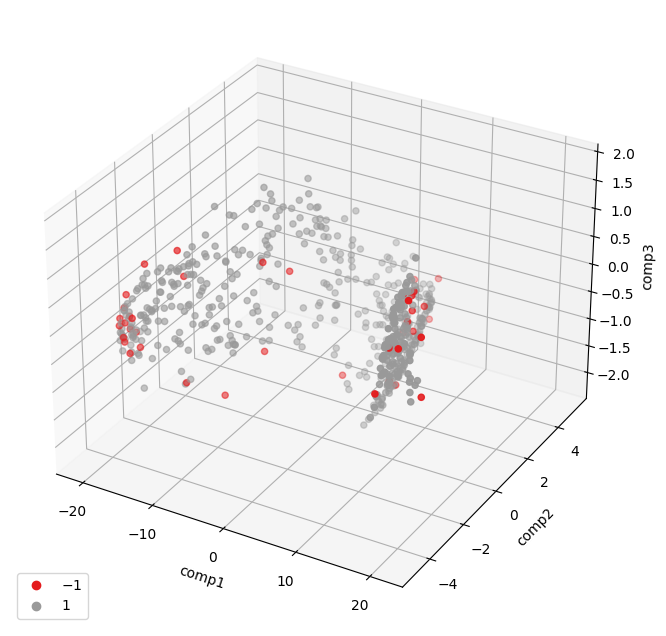

In [839]:
tsne = TSNE(perplexity=50, n_components=3).fit_transform(X) # TODO: é chegar a um valor de perplexity que mostre uma boa separação entre os grupos
tsne = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])

X['outliers'] = np.where(density_scores < threshold, -1, 1)
tsne['outliers'] = Pipeline(steps).fit_predict(X)


fig = plt.figure(figsize=(8, 8))  # create a new figure
ax = fig.add_subplot(111, projection='3d')  # create a 3D subplot
scatter = ax.scatter(tsne['comp1'], tsne['comp2'], tsne['comp3'], c=tsne['outliers'], cmap='Set1')  # create 3D scatter plot
# 
# add labels and legend
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.legend(*scatter.legend_elements(), loc='lower left')
# 
plt.show()  # display the plot
